In [1]:
%%capture
from source.active_learning.active_learning_ecg import *

In [2]:
# prepare data
es = ECGStream.from_(CSN2022)
es = es.shuffle()
num_max = (len(es))
es1000 = es.sub_es(range(min(1000, num_max)))
es = es.shuffle()
es100 = es.sub_es(range(min(100, num_max)))

label_encoder = LabelEncoder(CSN2022_LABELS)
func_ecg2x = lambda ecg: ecg.data.T[:, 0].reshape((-1, 1))
func_ecg2y = lambda ecg: label_encoder.label2y_single(ecg.label, onehot=True) if ecg.label else np.zeros(len(CSN2022_LABELS))
digitizer = ESDigitizer(16, func_ecg2x, func_ecg2y)
train_gen = digitizer.digitize_es(es1000)
test_gen = digitizer.digitize_es(es100)
x_test, y_test = test_gen.to_xy()
data = train_gen, x_test, y_test

m = es1000[0].data.shape[1]
n = len(CSN2022_LABELS)

  0%|          | 0/6 [00:00<?, ?it/s]

warning, large RAM consumption!


100%|██████████| 6/6 [00:03<00:00,  1.73it/s]


In [3]:
# get results of different AL method
acc_baseline = eval_prioritization_strategy(data, KerasRobustCNN3(m, 1, n), trivial_strategy)
acc_entropy = eval_prioritization_strategy(data, KerasRobustCNN3(m, 1, n), max_entropy_strategy)
acc_bt = eval_prioritization_strategy(data, KerasRobustCNN3(m, 1, n), least_margin_strategy)
acc_vr = eval_prioritization_strategy(data, KerasRobustCNN3(m, 1, n), least_confidence_strategy)

Training data size of 16 => accuracy 0.000000
Training data size of 32 => accuracy 0.000000
Training data size of 48 => accuracy 0.000000
Training data size of 64 => accuracy 0.000000
Training data size of 80 => accuracy 0.000000
Training data size of 96 => accuracy 0.010417
Training data size of 112 => accuracy 0.104167
Training data size of 128 => accuracy 0.187500
Training data size of 144 => accuracy 0.281250
Training data size of 160 => accuracy 0.364583
Training data size of 176 => accuracy 0.354167
Training data size of 192 => accuracy 0.375000
Training data size of 208 => accuracy 0.375000
Training data size of 224 => accuracy 0.364583
Training data size of 240 => accuracy 0.364583
Training data size of 256 => accuracy 0.364583
Training data size of 272 => accuracy 0.375000
Training data size of 288 => accuracy 0.447917
Training data size of 304 => accuracy 0.395833
Training data size of 320 => accuracy 0.562500
Training data size of 336 => accuracy 0.635417
Training data size 

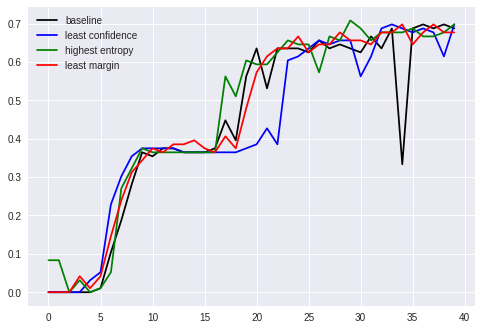

In [4]:
# visualize the performance difference
plt.plot(acc_baseline, 'k', label='baseline')
plt.plot(acc_vr, 'b', label='least confidence')
plt.plot(acc_entropy, 'g', label='highest entropy')
plt.plot(acc_bt, 'r', label='least margin')
plt.legend()